In [1]:
import pathlib
import usability
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Analytical analysis

## Severity

In [2]:
path = pathlib.Path("data", "analytisch", "severity.csv")
severity = pd.read_csv(path, index_col=0)
severity

,Irrelevant,Kosmetisch,Geringfügig,Bedeutend,Katastrophe
Shirtinator,0,6,6,5,2
Spreadshirt,0,5,6,3,2


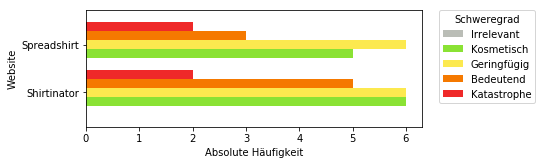

In [4]:
ax = severity.plot.barh(figsize=(7.7, 2.4), width=.95, color=("#BABDB6", "#8AE234", "#FCE94F", "#F57900", "#EF2929"))
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Website")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Schweregrad")
plt.tight_layout()

plt.savefig("abs.svg")

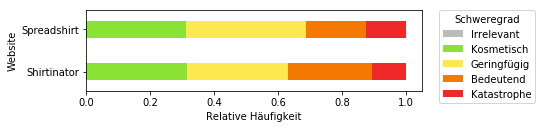

In [5]:
ax = severity.div(severity.sum(axis=1), axis=0).plot.barh(stacked=True, figsize=(7.7, 1.9), width=.4, color=("#BABDB6", "#8AE234", "#FCE94F", "#F57900", "#EF2929"))
plt.legend(bbox_to_anchor=(1.05, 1), loc=None, borderaxespad=0., title="Schweregrad")
ax.set_xlabel("Relative Häufigkeit")
ax.set_ylabel("Website")
plt.tight_layout()

plt.savefig("rel.svg")

In [179]:
path = pathlib.Path("data", "analytisch", "found-problems.csv")
problems = pd.read_csv(path, index_col=0)
problems

,Shirtinator,Spreadshirt
Severin,5,2
Felix,4,5
Carina So,4,5
Carina Sp,4,6
Valentin,8,1


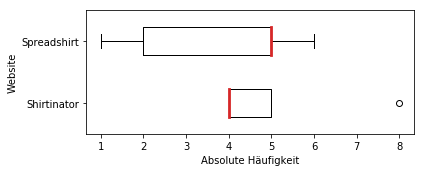

In [180]:
ax = problems.plot.box(vert=False, figsize=(6, 2.5), widths=[.45, .45], color={"whiskers": "black", "boxes": "black", 'medians': '#D62728'}, 
        medianprops={'linewidth': 2.8})
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Website")
plt.tight_layout()
plt.savefig("anzahl-probleme.svg")

In [ ]:
# Same Problems Spreadshirt

In [88]:
path = pathlib.Path("data", "analytisch", "übereinstimmung-spreadshirt.csv")
same = pd.read_csv(path, index_col=0)

In [89]:
same["Sum"] = same.sum(axis=1)
same = same.sort_values("Sum")
same

,Irrelevant,Kosmetisch,Gering,Bedeutend,Katastrophe,Irrelevant_S,Kosmetisch_S,Gering_S,Bedeutend_S,Katastrophe_S,Sum
Evaluator Dyade,,,,,,,,,,,
BC,0,0,1,2,0,0,0,0,0,0,3
AB,0,1,2,2,1,0,0,0,0,0,6
AC,0,1,1,2,1,0,0,0,1,0,6
BD,0,0,2,4,0,0,0,0,0,0,6
BE,0,1,4,1,1,0,0,0,0,0,7
CD,0,0,2,2,2,0,0,1,0,0,7
AD,0,1,3,2,1,0,0,0,1,0,8
CE,0,1,3,3,1,0,0,0,0,0,8
AE,0,2,4,1,0,0,0,0,1,1,9


In [90]:
same = pd.DataFrame([same["Irrelevant"], same["Irrelevant_S"], same["Kosmetisch"], same["Kosmetisch_S"],
              same["Gering"], same["Gering_S"], same["Bedeutend"], same["Bedeutend_S"],
              same["Katastrophe"], same["Katastrophe_S"]]).T

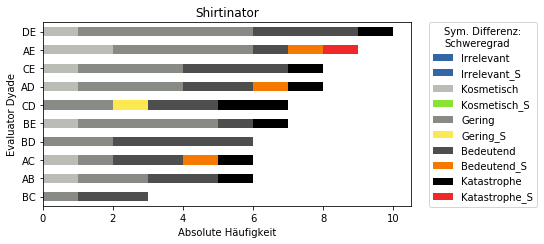

In [91]:
color = ("#3465A4","#3465A4",
         "#BABDB6","#8AE234",
         "#888A85","#FCE94F",
         "#4E4E4E","#F57900",
         "#000000", "#EF2929")

ax = same.plot.barh(stacked=True, title="Shirtinator", color=color, figsize=(7.7, 3.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=None, borderaxespad=0., title="Sym. Differenz:\nSchweregrad")

ax.set_xlabel("Absolute Häufigkeit")
plt.tight_layout()
plt.savefig("dyade-spread.svg")

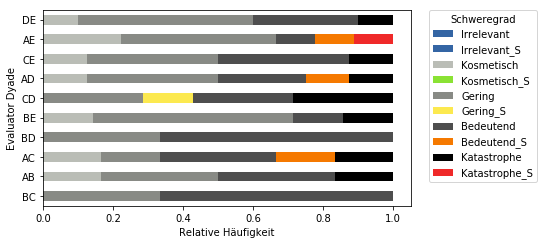

In [92]:
ax = same.div(same.sum(axis=1), axis=0).plot.barh(stacked=True, color=color, figsize=(7.7, 3.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=None, borderaxespad=0., title="Schweregrad")

ax.set_xlabel("Relative Häufigkeit")
plt.tight_layout()
plt.savefig("dyade-spread-rel.svg")

# Empirical analysis
## Determine optimal sample size – using data from the pilot study

Path to pilot study data:

In [2]:
directory = pathlib.Path("data", "empirisch", "pilot")

Constructing a `Sample` object, with which the data can be parsed and analyzed:

In [3]:
sample = usability.Sample(directory)

### First glance: statistical power

Here, at a significance level of $\alpha = 0.1$, varying sample sizes are plotted in relation to the statistical power for each data set. In the legend, Cohen’s $d$ is given as the effect size.

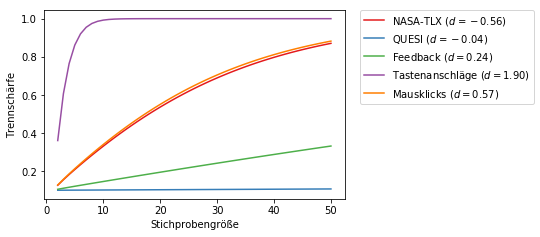

In [8]:
fig = sample.plot_power(alpha=0.1, sample_sizes=np.array(range(2, 51)), figsize=(7.7, 3.4))
plt.savefig("power-analysis.svg")

Although not much significance may be given to the result with a sample size of only 2, we want $power > 0.5$.

Finally, calling the `optimal_size()` method to calculate optimal sample sizes for each data collection and returning the median. 

In [5]:
result = sample.optimal_size(alpha=0.1, power=0.6)
result["median size"]

23.781142165842503

# Statistical testing
## Inspecting the data

In [2]:
directory = pathlib.Path("data", "empirisch", "collection")
sample = usability.Sample(directory)

### Pre-questionnaire

In [10]:
sample.pre.head(5)

,alter,beschäftigung,bildungsabschluss,geschlecht,pseudonym,vorkenntnisse
0,20,MCS,Gymnasium (Abitur),weiblich,ENPANO,nein
1,22,MCS,Gymnasium (Abitur),männlich,AIGÖAU,nein
2,20,Mensch-Computer-Systeme,Gymnasium (Abitur),männlich,ELCADE,nein
3,19,Mensch-Computer-Systeme Student,Gymnasium (Abitur),männlich,LDELJA,nein
4,24,Digital Humanities,Universitäts-/Hochschulabschluss,weiblich,ERALDE,spreadshirt.de


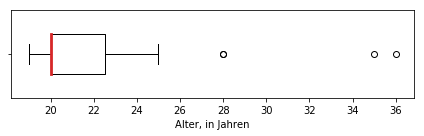

In [116]:
alter = sample.pre["alter"].apply(lambda x: int(x))
alter.name = "Alter"

ax = alter.plot.box(vert=False, figsize=(6, 2), widths=.45, color={"whiskers": "black", "boxes": "black", 'medians': '#D62728'}, 
        medianprops={'linewidth': 2.8})
ax.set_xlabel("Alter, in Jahren")
ax.set_yticklabels("")
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig("alter.svg")

In [39]:
beschäftigung = sample.pre["beschäftigung"].replace("MCS", "Student (Mensch-Computer-Systeme)")
beschäftigung = beschäftigung.replace("Mensch-Computer-Systeme", "Student (Mensch-Computer-Systeme)")
beschäftigung = beschäftigung.replace("Mensch-Computer-Systeme (Student)", "Student (Mensch-Computer-Systeme)")
beschäftigung = beschäftigung.replace("Chemie Bachelor", "Student (Chemie)")
beschäftigung = beschäftigung.replace("digital humanities", "Student (Digital Humanities)")
beschäftigung = beschäftigung.replace("Physik", "Student (Physik)")
beschäftigung = beschäftigung.replace("digital humanities", "Student (Digital Humanities)")
beschäftigung = beschäftigung.replace("Mensch-Computer-Systeme Student", "Student (Mensch-Computer-Systeme)")
beschäftigung = beschäftigung.replace("digital humanities".title(), "Student (Digital Humanities)")
beschäftigung = beschäftigung.replace("Student MCS", "Student (Mensch-Computer-Systeme)")

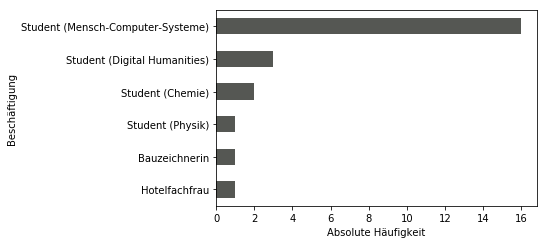

In [52]:
ax = beschäftigung.value_counts().sort_values().plot.barh(color="#555753", figsize=(7.7, 3.5))
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Beschäftigung")
plt.tight_layout()
plt.savefig("beschäftigung.svg")

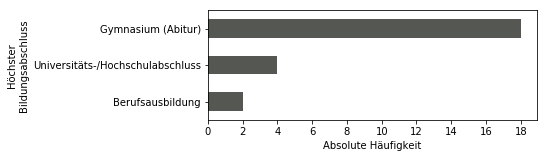

In [62]:
ax = sample.pre["bildungsabschluss"].value_counts().sort_values().plot.barh(color="#555753", figsize=(7.7, 2.3))
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Höchster\nBildungsabschluss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig("bildungsabschluss.svg")

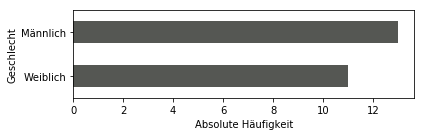

In [70]:
ax = sample.pre["geschlecht"].apply(lambda x: x.title()).value_counts().sort_values().plot.barh(color="#555753", figsize=(6, 2))
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Geschlecht")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig("geschlecht.svg")

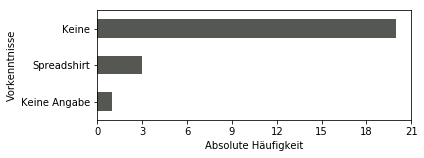

In [73]:
ax = sample.pre["vorkenntnisse"].replace("n. a.", "Keine Angabe").replace("spreadshirt.de", "Spreadshirt").replace("nein", "Keine").value_counts().sort_values().plot.barh(color="#555753", figsize=(6, 2.3))
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Vorkenntnisse")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig("vorkenntnisse.svg")

### NASA-TLX

In [8]:
sample.nasa.head(5)

,pseudonym,score,survey,website
0,ENPANO,9.166667,nasa,spreadshirt
1,ENPANO,10.833333,nasa,shirtinator
2,AIGÖAU,26.666667,nasa,spreadshirt
3,AIGÖAU,42.500000,nasa,shirtinator
4,ELCADE,15.000000,nasa,spreadshirt


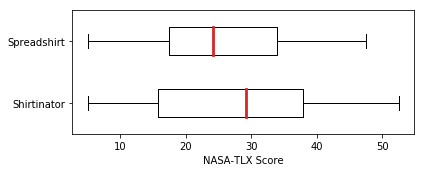

In [119]:
df = pd.DataFrame(columns=["Shirtinator", "Spreadshirt"])
df.loc[:, "Spreadshirt"] = sample.nasa[sample.nasa["website"] == "spreadshirt"]["score"].values
df.loc[:, "Shirtinator"] = sample.nasa[sample.nasa["website"] == "shirtinator"]["score"].values

ax = df.plot.box(vert=False, figsize=(6, 2.5), widths=[.45, .45], color={"whiskers": "black", "boxes": "black", 'medians': '#D62728'}, 
        medianprops={'linewidth': 2.8})
ax.set_xlabel("NASA-TLX Score")
plt.tight_layout()
plt.savefig("nasa.svg")

### QUESI

In [9]:
sample.quesi.head(5)

,pseudonym,score,survey,website
0,ENPANO,4.4,quesi,shirtinator
1,ENPANO,4.5,quesi,spreadshirt
2,AIGÖAU,1.9,quesi,shirtinator
3,AIGÖAU,3.9,quesi,spreadshirt
4,ELCADE,3.9,quesi,shirtinator


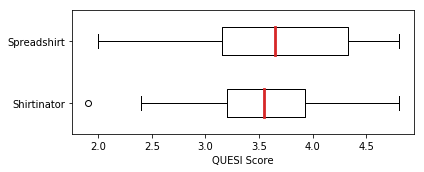

In [120]:
df = pd.DataFrame(columns=["Shirtinator", "Spreadshirt"])
df.loc[:, "Spreadshirt"] = sample.quesi[sample.quesi["website"] == "spreadshirt"]["score"].values
df.loc[:, "Shirtinator"] = sample.quesi[sample.quesi["website"] == "shirtinator"]["score"].values

ax = df.plot.box(vert=False, figsize=(6, 2.5), widths=[.45, .45], color={"whiskers": "black", "boxes": "black", 'medians': '#D62728'}, 
        medianprops={'linewidth': 2.8})
ax.set_xlabel("QUESI Score")
plt.tight_layout()
plt.savefig("quesi.svg")

### Feedback

In [10]:
sample.feedback.head(5)

,negativ,positiv,pseudonym,website,ratio
0,2,3,ENPANO,spreadshirt,0.750000
1,5,1,ENPANO,shirtinator,3.000000
2,8,18,AIGÖAU,spreadshirt,0.473684
3,21,8,AIGÖAU,shirtinator,2.444444
4,5,12,ELCADE,spreadshirt,0.461538


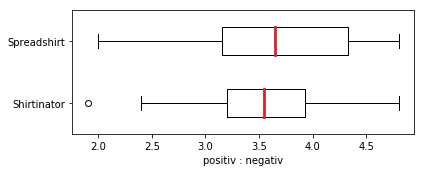

In [4]:
df = pd.DataFrame(columns=["Shirtinator", "Spreadshirt"])
df.loc[:, "Spreadshirt"] = sample.quesi[sample.quesi["website"] == "spreadshirt"]["score"].values
df.loc[:, "Shirtinator"] = sample.quesi[sample.quesi["website"] == "shirtinator"]["score"].values

ax = df.plot.box(vert=False, figsize=(6, 2.5), widths=[.45, .45], color={"whiskers": "black", "boxes": "black", 'medians': '#D62728'}, 
        medianprops={'linewidth': 2.8})
ax.set_xlabel("positiv : negativ")
plt.tight_layout()
plt.savefig("feedback.svg")

### Mouse clicks

In [12]:
sample.mouse.head(5)

,clicks,pseudonym,website
0,101,ENPANO,shirtinator
1,112,ENPANO,spreadshirt
2,132,AIGÖAU,shirtinator
3,88,AIGÖAU,spreadshirt
4,96,ELCADE,shirtinator


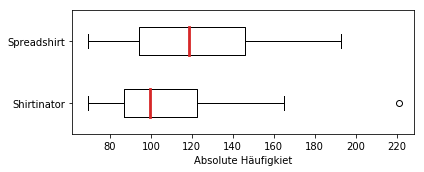

In [124]:
df = pd.DataFrame(columns=["Shirtinator", "Spreadshirt"])
df.loc[:, "Spreadshirt"] = sample.mouse[sample.mouse["website"] == "spreadshirt"]["clicks"].values
df.loc[:, "Shirtinator"] = sample.mouse[sample.mouse["website"] == "shirtinator"]["clicks"].values

ax = df.plot.box(vert=False, figsize=(6, 2.5), widths=[.45, .45], color={"whiskers": "black", "boxes": "black", 'medians': '#D62728'}, 
        medianprops={'linewidth': 2.8})
ax.set_xlabel("Absolute Häufigkiet")
plt.tight_layout()
plt.savefig("maus.svg")

### Post-questionnaire

In [13]:
sample.post.head(5)

,besser,negativ shirtinator,negativ spreadshirt,positiv shirtinator,positiv spreadshirt,pseudonym
0,spreadshirt.de,Das Bild wurde einmal nicht angezeigt beim Hoc...,man konnte das bild aus dem druckbereich hinau...,Es war ein vorgegebener Bereich für die Bilder...,Leicht zu bedienen \r\nsieht schöner aus,ENPANO
1,spreadshirt.de,"Inkonsistente Fenster, wenn ""Zurück"" ist Arbei...",wenig Hilfestellung (mousehover info zb),nichts,"ziemlich einfach zu bedienen, Rückgängigmachen...",AIGÖAU
2,shirtinator.de,,,Ich fand die Seite sah freundlicher aus.,,ELCADE
3,shirtinator.de,Beim Ändern des Geschlechts änderte sich auch ...,Dass man das Umstellen des Geschlechts mühseli...,"Die Knöpfe waren da, wo ich sie vermutete, und...",Die Seite wirkte aufgeräumter/übersichtlicher,LDELJA
4,shirtinator.de,die Auswahl der Motivpositionierung kann verwi...,die Auswahl der Motivpositionierung kann verwi...,Qualitätsangabe des eigenen Druckmotivs\r\nVie...,gute Übersichtlichkeit\r\nsehr schlichte und s...,ERALDE


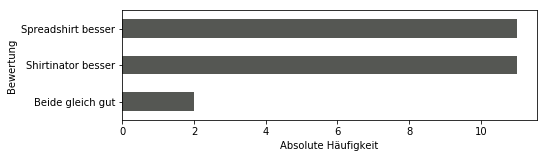

In [128]:
besser = sample.post.besser.value_counts()
besser.index = ["Shirtinator besser", "Spreadshirt besser", "Beide gleich gut"]

ax = besser.sort_values().plot.barh(color="#555753", figsize=(7.7, 2.3))
ax.set_xlabel("Absolute Häufigkeit")
ax.set_ylabel("Bewertung")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig("bewertung.svg")

## Check prerequisites for t-test

In [17]:
collections = [sample.nasa, sample.quesi, sample.feedback, sample.mouse]
columns = ["score", "score", "ratio", "clicks"]

### 1. Normal distribution

In [18]:
usability.normal_distribution(collections, columns)

{'NASA-TLX-spreadshirt-score': {'stat': 0.956, 'p': 0.368, 'gaussian': True},
 'NASA-TLX-shirtinator-score': {'stat': 0.96, 'p': 0.438, 'gaussian': True},
 'QUESI-spreadshirt-score': {'stat': 0.972, 'p': 0.705, 'gaussian': True},
 'QUESI-shirtinator-score': {'stat': 0.983, 'p': 0.946, 'gaussian': True},
 'Feedback-spreadshirt-ratio': {'stat': 0.924, 'p': 0.071, 'gaussian': True},
 'Feedback-shirtinator-ratio': {'stat': 0.878, 'p': 0.008, 'gaussian': False},
 'Mouse-spreadshirt-clicks': {'stat': 0.959, 'p': 0.419, 'gaussian': True},
 'Mouse-shirtinator-clicks': {'stat': 0.833, 'p': 0.001, 'gaussian': False}}

### 2. Homogeneity of variances

In [19]:
usability.variance_homogeneity(collections, columns)

{'NASA-TLX-score': {'stat': 0.592, 'p': 0.446, 'homogeneous': True},
 'QUESI-score': {'stat': 0.296, 'p': 0.589, 'homogeneous': True},
 'Feedback-ratio': {'stat': 5.568, 'p': 0.023, 'homogeneous': False},
 'Mouse-clicks': {'stat': 0.19, 'p': 0.665, 'homogeneous': True}}

## t-test for NASA-TLX and QUESI

In [20]:
ALPHA = 0.2

### 1. NASA-TLX

In [21]:
x = sample.nasa[sample.nasa["website"] == "spreadshirt"]["score"].values
y = sample.nasa[sample.nasa["website"] == "shirtinator"]["score"].values

In [22]:
usability.t_test(x, y, alpha=ALPHA)

{'stat': -0.597, 'p': 0.556, 'equal': True}

### 2. QUESI

In [23]:
x = sample.quesi[sample.quesi["website"] == "spreadshirt"]["score"].values
y = sample.quesi[sample.quesi["website"] == "shirtinator"]["score"].values

In [24]:
usability.t_test(x, y, alpha=ALPHA)

{'stat': 0.764, 'p': 0.452, 'equal': True}

## Wilcoxon test for Feedback and Mouse

### 1. Feedback

In [25]:
x = sample.feedback[sample.feedback["website"] == "spreadshirt"]["ratio"].values
y = sample.feedback[sample.feedback["website"] == "shirtinator"]["ratio"].values

In [26]:
usability.wilcoxon(x, y, alpha=ALPHA)

{'stat': 106.0, 'p': 0.209, 'equal': True}

### 2. Mouse

In [27]:
x = sample.mouse[sample.mouse["website"] == "spreadshirt"]["clicks"].values
y = sample.mouse[sample.mouse["website"] == "shirtinator"]["clicks"].values

In [28]:
usability.wilcoxon(x, y, alpha=ALPHA)

{'stat': 83.0, 'p': 0.056, 'equal': False}